<a href="https://colab.research.google.com/github/muhajirakbarhsb/NLP_class_2023/blob/main/Week_Class_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim
from gensim.models.phrases import Phrases, Phraser
import numpy as np

In [2]:
!pip install pyLDAvis==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.5

In [3]:
!pip install pandas==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.1 which is incompatible.


In [2]:
df = pd.read_csv('data_clean_all.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,at,content,score,userName,contentp,contentp_clean
0,2023-10-06 10:07:21,"makin sini makin parah , Lola, mahal",1,MIFTAHUDDIN JUHDI,makin sini makin parah lola mahal,makin sini makin parah lambat mahal
1,2023-10-06 07:27:57,Makin hari paket nya makin mahal,1,Fandi Rahmadi,makin hari paket nya makin mahal,makin hari paket nya makin mahal
2,2023-10-06 06:12:55,"Semua saran sudah kami lakukan, hasilnya tetap...",1,Jimmy Jimmy,semua saran sudah kami lakukan hasilnya tetap ...,semua saran kami laku hasil tetap lambat sisa ...
3,2023-10-06 04:12:21,Aplikasi yang baik,5,Princess Khan,aplikasi yang baik,aplikasi baik
4,2023-10-05 15:41:08,"Siapa yang menyesal beli modem ini,🙋🙋🙋 aku aku...",1,PETER 65,siapa yang menyesal beli modem ini aku aku aku...,siapa sesal beli modem aku aku aku paket nya m...
...,...,...,...,...,...,...
3183,2023-01-01 08:28:28,Internet jelek,1,Rafael,internet jelek,internet jelek
3184,2023-01-01 07:54:02,Pilihan Menu pembelian paket nya gak ada.. gan...,5,Rahmat Samsudin,pilihan menu pembelian paket nya gak ada gangg...,pilih menu beli paket nya ada ganggu
3185,2023-01-01 06:10:55,Sekarang gak bisa beli kuota 100gb... cuma ada...,1,aby habibie,sekarang gak bisa beli kuota gb cuma ada gb gb...,sekarang bisa beli kuota gb cuma gb gb buat ap...
3186,2023-01-01 02:48:24,Saya sudah pakai orbit hampir 1thn tapi kemari...,5,Azkayrah Zahwa,saya sudah pakai orbit hampir thn tapi kemarin...,pakai orbit hampir thn kemarin mau sambung hp ...


In [3]:
dfa = df[['contentp_clean']]
dfa = dfa.dropna()
dfa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,contentp_clean
0,makin sini makin parah lambat mahal
1,makin hari paket nya makin mahal
2,semua saran kami laku hasil tetap lambat sisa ...
3,aplikasi baik
4,siapa sesal beli modem aku aku aku paket nya m...
...,...
3183,internet jelek
3184,pilih menu beli paket nya ada ganggu
3185,sekarang bisa beli kuota gb cuma gb gb buat ap...
3186,pakai orbit hampir thn kemarin mau sambung hp ...


In [4]:
from helper import *
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
text = dfa['contentp_clean']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

3166
[['makin', 'sini', 'makin', 'parah', 'lambat', 'mahal'], ['makin', 'hari', 'paket', 'nya', 'makin', 'mahal'], ['semua', 'saran', 'kami', 'laku', 'hasil', 'tetap', 'lambat', 'sisa', 'lempar', 'belum'], ['aplikasi', 'baik'], ['siapa', 'sesal', 'beli', 'modem', 'aku', 'aku', 'aku', 'paket', 'nya', 'mahal', 'sering', 'lag'], ['bagus'], ['sudah', 'ganti', 'nama', 'perangkat', 'password', 'aplikasi', 'muncul', 'nama', 'lama', 'sdgkan', 'hubung', 'nama', 'password', 'baru'], ['install', 'aplikasi', 'my', 'orbit', 'modem', 'baru', 'orbit', 'star', 'install', 'koneksi', 'modem', 'ganti', 'password', 'username', 'selalu', 'muncul', 'ingat', 'cari', 'sambung', 'modem', 'dekat', 'ponsel', 'perangkat', 'wifi', 'sudah', 'dekat', 'masih', 'tetap', 'sama', 'tidak', 'sambung', 'tidak', 'bisa', 'ganti', 'user', 'maupun', 'password', 'modem', 'nya'], ['bintang', 'dulu', 'karna', 'aplikasi', 'hancur', 'bugnya', 'luar', 'biasa', 'sering', 'hubung', 'bisa', 'atur', 'jadwal', 'tamu', 'bisa', 'blokir', '

In [6]:
import gensim
#Create Bigram & Trigram Models
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [7]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<809 unique tokens: ['lambat', 'mahal', 'makin', 'makin_parah', 'makin_sini']...>


In [8]:
#https://radimrehurek.com/gensim/tut1.html
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word,
converts the word to its integer word id and returns the result as a sparse vector.
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”,
the words computer (id 0) and human (id 1) appear once;
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

3166
[(32, 2), (38, 2), (40, 1), (48, 1), (49, 1), (53, 1), (121, 2), (170, 1), (301, 1), (324, 1), (334, 2), (340, 6), (354, 1)]


## Coherence Graph

In [9]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

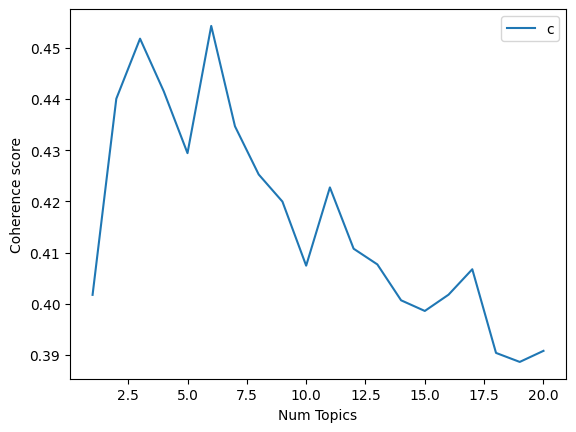

In [10]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
coherence_values

[0.40172653222808413,
 0.44005862689035097,
 0.4518037163517607,
 0.4415053249882799,
 0.42942417414239,
 0.4542922622887901,
 0.43467867190462756,
 0.42525780152644427,
 0.4199574839059608,
 0.4074355380160454,
 0.4227269708360394,
 0.41074695996236116,
 0.40767812261224257,
 0.4006618374102218,
 0.3985803095640024,
 0.40176176877991365,
 0.4067318846814808,
 0.39037857113521063,
 0.38861773215722684,
 0.390782819272688]

In [13]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.401727
Num Topics = 2  has Coherence Value of 0.440059
Num Topics = 3  has Coherence Value of 0.451804
Num Topics = 4  has Coherence Value of 0.441505
Num Topics = 5  has Coherence Value of 0.429424
Num Topics = 6  has Coherence Value of 0.454292
Num Topics = 7  has Coherence Value of 0.434679
Num Topics = 8  has Coherence Value of 0.425258
Num Topics = 9  has Coherence Value of 0.419957
Num Topics = 10  has Coherence Value of 0.407436
Num Topics = 11  has Coherence Value of 0.422727
Num Topics = 12  has Coherence Value of 0.410747
Num Topics = 13  has Coherence Value of 0.407678
Num Topics = 14  has Coherence Value of 0.400662
Num Topics = 15  has Coherence Value of 0.39858
Num Topics = 16  has Coherence Value of 0.401762
Num Topics = 17  has Coherence Value of 0.406732
Num Topics = 18  has Coherence Value of 0.390379
Num Topics = 19  has Coherence Value of 0.388618
Num Topics = 20  has Coherence Value of 0.390783


In [14]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=3) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.026*"bagus" + 0.024*"mantap" + 0.018*"harga_paket" + 0.016*"lebih_baik" + 0.015*"baik" + 0.015*"mahal" + 0.014*"sangat" + 0.012*"sering_error" + 0.010*"aplikasi" + 0.010*"harga"
Topic: 1 Word: 0.012*"paket_data" + 0.012*"bisa" + 0.012*"susah" + 0.012*"aplikasi" + 0.011*"nya" + 0.011*"beli" + 0.011*"kuota" + 0.010*"login" + 0.009*"terus" + 0.009*"jelek"
Topic: 2 Word: 0.023*"oke" + 0.013*"orbit" + 0.011*"aplikasi" + 0.010*"customer_service" + 0.010*"bisa" + 0.010*"lambat" + 0.009*"beli" + 0.008*"kok" + 0.008*"makin_kesini" + 0.008*"log_out"


In [15]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [16]:
dictionary

In [17]:
corpus_tfidf

In [18]:
pyLDAvis.__version__

'3.4.0'

In [52]:
!pip install pyLDAvis==3.4.1

In [19]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.020571 -0.069876       1        1  35.687558
0     -0.077759  0.018960       2        1  32.718854
2      0.057188  0.050916       3        1  31.593588, topic_info=            Term       Freq      Total Category  logprob  loglift
297          oke  64.000000  64.000000  Default  30.0000  30.0000
219   lebih_baik  41.000000  41.000000  Default  29.0000  29.0000
28         bagus  83.000000  83.000000  Default  28.0000  28.0000
448       mantap  76.000000  76.000000  Default  27.0000  27.0000
216  harga_paket  58.000000  58.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
103        pakai  12.997367  50.499522   Topic3  -5.2346  -0.2050
305        susah  13.144475  53.678128   Topic3  -5.2233  -0.2548
125   paket_data  12.971604  58.825094   Topic3  -5.2366  -0.3596
195       sinyal  12.135199

In [37]:
model.save('model')

## Mapping Topic

In [40]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
texts = []
for i in dfa['contentp_clean']:
  tokens = tokenizer.tokenize(i)
  texts.append(tokens)

In [42]:
# load model
ldamodel = gensim.models.ldamodel.LdaModel.load('model')
# turn our tokenized documents into a id <-> term dictionary
dictionary = ldamodel.id2word

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
  # Init output
  sent_topics_df = pd.DataFrame()

  # Get main topic in each document
  for i, row_list in enumerate(ldamodel[corpus]):
    row = row_list[0] if ldamodel.per_word_topics else row_list
    print(row)
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0:
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

  # Add original text to the end of the output
  contents = pd.Series(texts)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
  return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic

[(0, 0.057849623), (1, 0.8879749), (2, 0.054175448)]
[(0, 0.07135803), (1, 0.8682261), (2, 0.060415853)]
[(0, 0.044155132), (1, 0.2575944), (2, 0.6982505)]
[(0, 0.7469485), (1, 0.12696983), (2, 0.12608172)]
[(0, 0.48967114), (1, 0.47705916), (2, 0.033269737)]
[(0, 0.6594895), (1, 0.17130941), (2, 0.16920109)]
[(0, 0.025831461), (1, 0.027722515), (2, 0.94644606)]
[(0, 0.010900337), (1, 0.9769479), (2, 0.012151741)]
[(0, 0.39020598), (1, 0.48049468), (2, 0.12929934)]
[(0, 0.46862453), (1, 0.44006723), (2, 0.09130824)]
[(0, 0.70959157), (1, 0.15735188), (2, 0.13305655)]
[(0, 0.0804318), (1, 0.9058264), (2, 0.013741807)]
[(0, 0.022351002), (1, 0.12340515), (2, 0.8542438)]
[(0, 0.020634111), (1, 0.22741482), (2, 0.75195104)]
[(0, 0.5115099), (1, 0.2859228), (2, 0.20256731)]
[(0, 0.40047297), (1, 0.5896325)]
[(0, 0.027927311), (1, 0.02868561), (2, 0.94338703)]
[(0, 0.10339343), (1, 0.029030107), (2, 0.8675765)]
[(0, 0.07268009), (1, 0.85209507), (2, 0.0752248)]
[(0, 0.24639457), (1, 0.573000

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.8880,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[makin, sini, makin, parah, lambat, mahal]"
1,1,1,0.8682,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[makin, hari, paket, nya, makin, mahal]"
2,2,2,0.6983,"oke, orbit, aplikasi, customer_service, bisa, ...","[semua, saran, kami, laku, hasil, tetap, lamba..."
3,3,0,0.7469,"bagus, mantap, harga_paket, lebih_baik, baik, ...","[aplikasi, baik]"
4,4,0,0.4897,"bagus, mantap, harga_paket, lebih_baik, baik, ...","[siapa, sesal, beli, modem, aku, aku, aku, pak..."
...,...,...,...,...,...
3161,3161,1,0.7527,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[internet, jelek]"
3162,3162,2,0.8861,"oke, orbit, aplikasi, customer_service, bisa, ...","[pilih, menu, beli, paket, nya, ada, ganggu]"
3163,3163,1,0.5176,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[sekarang, bisa, beli, kuota, gb, cuma, gb, gb..."
3164,3164,1,0.9551,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[pakai, orbit, hampir, thn, kemarin, mau, samb..."


In [45]:
df_dominant_topic['contentp_clean'] = df_dominant_topic['Text'].apply(' '.join)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,contentp_clean
0,0,1,0.8880,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[makin, sini, makin, parah, lambat, mahal]",makin sini makin parah lambat mahal
1,1,1,0.8682,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[makin, hari, paket, nya, makin, mahal]",makin hari paket nya makin mahal
2,2,2,0.6983,"oke, orbit, aplikasi, customer_service, bisa, ...","[semua, saran, kami, laku, hasil, tetap, lamba...",semua saran kami laku hasil tetap lambat sisa ...
3,3,0,0.7469,"bagus, mantap, harga_paket, lebih_baik, baik, ...","[aplikasi, baik]",aplikasi baik
4,4,0,0.4897,"bagus, mantap, harga_paket, lebih_baik, baik, ...","[siapa, sesal, beli, modem, aku, aku, aku, pak...",siapa sesal beli modem aku aku aku paket nya m...
...,...,...,...,...,...,...
3161,3161,1,0.7527,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[internet, jelek]",internet jelek
3162,3162,2,0.8861,"oke, orbit, aplikasi, customer_service, bisa, ...","[pilih, menu, beli, paket, nya, ada, ganggu]",pilih menu beli paket nya ada ganggu
3163,3163,1,0.5176,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[sekarang, bisa, beli, kuota, gb, cuma, gb, gb...",sekarang bisa beli kuota gb cuma gb gb buat ap...
3164,3164,1,0.9551,"paket_data, bisa, susah, aplikasi, nya, beli, ...","[pakai, orbit, hampir, thn, kemarin, mau, samb...",pakai orbit hampir thn kemarin mau sambung hp ...


In [46]:
topic_mapping = {
    0: "Harga Mahal",
    1: "Aplikasi Error",
    2: "Pelayanan",
    # Add mappings for all your topics
}

In [47]:
df_dominant_topic['Topic'] = df_dominant_topic['Dominant_Topic'].map(topic_mapping)

In [50]:
list(df_dominant_topic)

['Document_No',
 'Dominant_Topic',
 'Topic_Perc_Contrib',
 'Keywords',
 'Text',
 'contentp_clean',
 'Topic']

In [52]:
df_dominant_topic = df_dominant_topic[[
 'Dominant_Topic',
 'Topic_Perc_Contrib',
 'Keywords',
 'contentp_clean',
 'Topic']]
df_dominant_topic

,Dominant_Topic,Topic_Perc_Contrib,Keywords,contentp_clean,Topic
0,1,0.8880,"paket_data, bisa, susah, aplikasi, nya, beli, ...",makin sini makin parah lambat mahal,Aplikasi Error
1,1,0.8682,"paket_data, bisa, susah, aplikasi, nya, beli, ...",makin hari paket nya makin mahal,Aplikasi Error
2,2,0.6983,"oke, orbit, aplikasi, customer_service, bisa, ...",semua saran kami laku hasil tetap lambat sisa ...,Pelayanan
3,0,0.7469,"bagus, mantap, harga_paket, lebih_baik, baik, ...",aplikasi baik,Harga Mahal
4,0,0.4897,"bagus, mantap, harga_paket, lebih_baik, baik, ...",siapa sesal beli modem aku aku aku paket nya m...,Harga Mahal
...,...,...,...,...,...
3161,1,0.7527,"paket_data, bisa, susah, aplikasi, nya, beli, ...",internet jelek,Aplikasi Error
3162,2,0.8861,"oke, orbit, aplikasi, customer_service, bisa, ...",pilih menu beli paket nya ada ganggu,Pelayanan
3163,1,0.5176,"paket_data, bisa, susah, aplikasi, nya, beli, ...",sekarang bisa beli kuota gb cuma gb gb buat ap...,Aplikasi Error
3164,1,0.9551,"paket_data, bisa, susah, aplikasi, nya, beli, ...",pakai orbit hampir thn kemarin mau sambung hp ...,Aplikasi Error


In [54]:
topic_percentages = df_dominant_topic['Topic'].value_counts(normalize=True) * 100

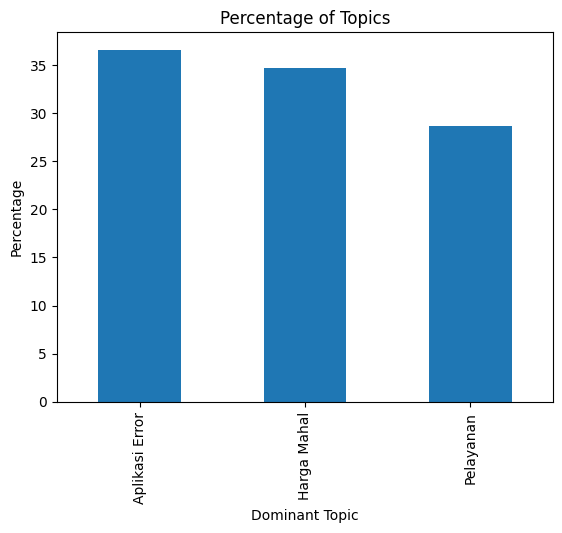

In [55]:
import matplotlib.pyplot as plt

topic_percentages.plot(kind='bar')
plt.xlabel('Dominant Topic')
plt.ylabel('Percentage')
plt.title('Percentage of Topics')
plt.show()

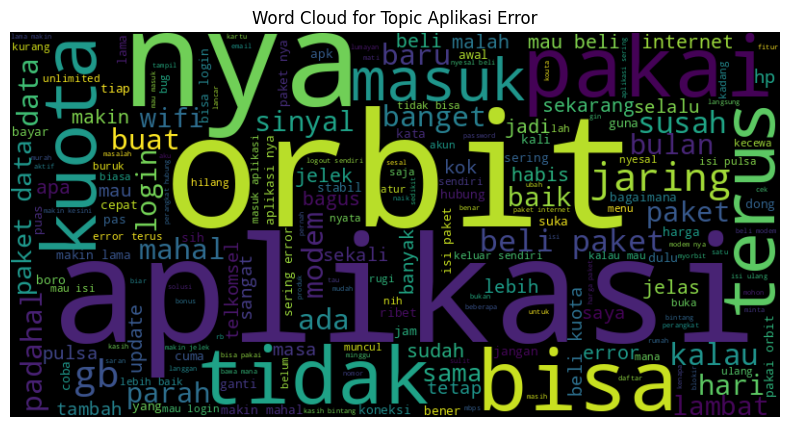

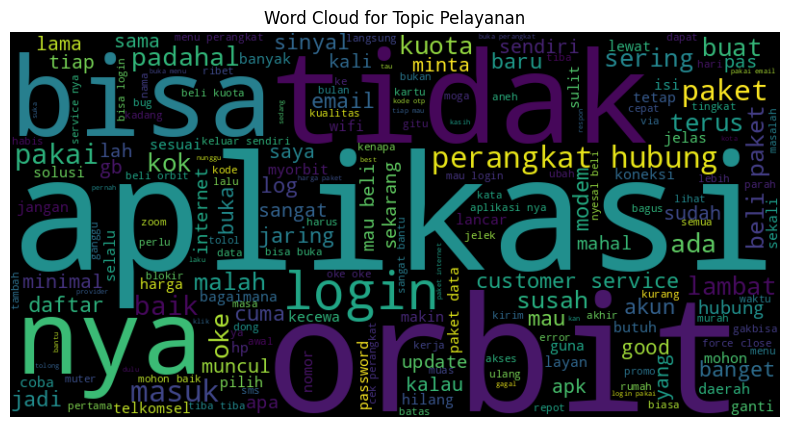

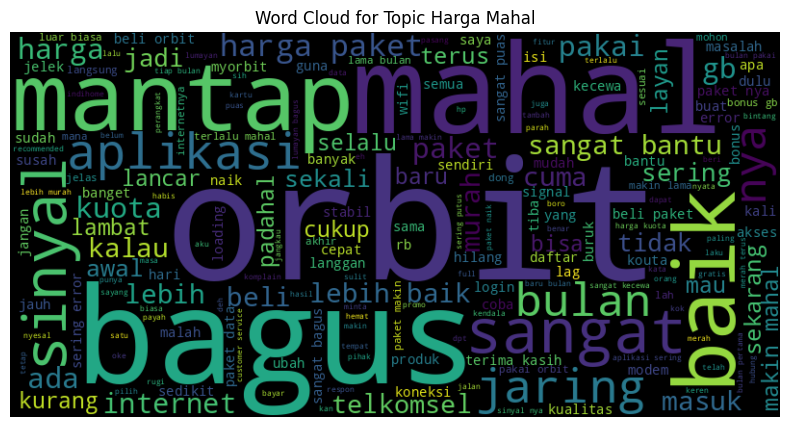

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

unique_topics = df_dominant_topic['Topic'].unique()

for topic in unique_topics:
    text = ' '.join(df_dominant_topic[df_dominant_topic['Topic'] == topic]['contentp_clean'])
    wordcloud = WordCloud(width=800, height=400).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic}")
    plt.show()